In [0]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle

In [0]:
data = pd.read_csv("student-mat.csv", sep=";")
# Since our data is seperated by semicolons we need to do sep=";"

In [29]:
print(data.head())

  school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]


In [30]:
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [0]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

In [0]:
predict = "G3"
X= np.array(data.drop([predict], 1))
y= np.array(data[predict])

In [0]:
# Data split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [0]:
# Define Model
linear = linear_model.LinearRegression()

In [35]:
#Train and Score
linear.fit(X_train, y_train)
acc = linear.score(X_train, y_train)
acc1 = linear.score(X_test, y_test)
print(acc, acc1)

0.8342841281051602 0.7823592760555229


In [36]:
#View the constants
print('Coefficient: \n', linear.coef_) # These are each slope value
print('Intercept: \n', linear.intercept_) # This is the intercept

Coefficient: 
 [ 0.12768699  0.98579608 -0.17620448 -0.20700099  0.02938019]
Intercept: 
 -1.2510232319702457


In [37]:
predictions = linear.predict(X_test)
for x in range(len(predictions)):
  print(predictions[x], X_test[x], y_test[x])

7.559806286277203 [10  8  2  0  0] 9
15.079753111471023 [16 15  4  0  7] 17
8.466432865995309 [8 9 1 0 0] 8
5.136226568559688 [6 6 2 0 2] 6
8.82916137018456 [9 9 1 0 8] 10
12.744160638814739 [12 13  2  0  0] 13
10.35382258180324 [13 10  2  1 22] 11
15.226500736003493 [16 15  2  0  0] 15
9.904369831872664 [12 10  3  0 10] 12
14.971126763394905 [14 15  2  0  0] 15
5.174356662191588 [7 6 1 1 0] 0
16.291466308256965 [18 16  3  0  0] 16
8.545602362262994 [10  9  2  0  0] 0
12.140307029392007 [12 12  2  0 13] 13
5.322673934335221 [7 6 2 0 4] 6
4.4735359175929 [6 5 1 0 7] 6
14.922609273358296 [15 15  3  0  0] 15
6.826926029157455 [ 9  7  2  1 20] 8
8.348988769125645 [8 9 2 0 2] 8
6.975166639228274 [ 9  7  2  0 18] 6
11.81712494230019 [12 12  2  0  2] 11
3.8361516335239907 [7 5 3 1 0] 0
17.198092887975072 [16 17  2  0  0] 17
6.063262265074238 [6 7 2 0 0] 0
9.600401707154653 [11 10  3  0  4] 11
8.121578662787144 [6 9 1 1 4] 8
13.906161191141434 [12 14  1  0  0] 15
10.575954893705813 [10 11  2  

No handles with labels found to put in legend.


Accuracy: 0.8000809706729771
Accuracy: 0.8424748549436384
Accuracy: 0.7880045342104384
Accuracy: 0.889735724858175
Accuracy: 0.72844817260162
Accuracy: 0.7384393207462819
Accuracy: 0.8329601770500357
Accuracy: 0.730972459466676
Accuracy: 0.8099058003656161
Accuracy: 0.8563125651033394
Accuracy: 0.8239199694939332
Accuracy: 0.8418508427187585
Accuracy: 0.8601627309070958
Accuracy: 0.7944372176408296
Accuracy: 0.9047221363240434
Accuracy: 0.8056180680768965
Accuracy: 0.7730675514577863
Accuracy: 0.7135584381846363
Accuracy: 0.7849374791239835
Accuracy: 0.7701738738507218
-------------------------
Coefficient: 
 [ 0.14327402  0.98480632 -0.22432388 -0.3302456   0.03518032]
Intercept: 
 -1.344183447644376
-------------------------
12.109178043934694 [12 12  1  0  4] 13
5.519150341614196 [7 6 1 0 5] 7
6.819754549221301 [9 8 1 3 6] 10
7.13496697240012 [ 8  8  4  0 10] 8
11.268060528473315 [10 12  2  1  4] 12
13.857019540648404 [13 14  2  0  0] 15
11.3953606826792 [ 8 12  1  0  0] 12
10.13701

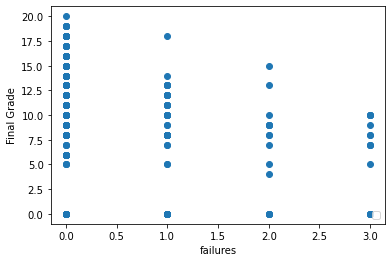

In [40]:
# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(20):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(X_train, y_train)
    acc = linear.score(X_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

# LOAD MODEL
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)


print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predicted= linear.predict(X_test)
for x in range(len(predicted)):
    print(predicted[x], X_test[x], y_test[x])


# Drawing and plotting model
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()